In [66]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import pylab
from skimage.io import imread
from skimage import img_as_float
from sklearn.metrics import mean_squared_error
from skimage.util import img_as_ubyte
import math
image = imread('C:/Users/bodak/Desktop/_3160f0832cf89866f4cc20e07ddf1a67_parrots.jpg')

In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [7]:
image 

array([[[  4, 126,   5],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  55,   4],
        [  0,  53,   4],
        [  3,  55,   9]],

       [[  4, 126,   5],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  53,   3],
        [  0,  53,   4],
        [  0,  52,   6]],

       [[  3, 125,   4],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  53,   3],
        [  0,  53,   4],
        [  0,  52,   6]],

       ...,

       [[121,  96,   6],
        [115,  90,   0],
        [115,  94,   3],
        ...,
        [  8,  21,  27],
        [ 12,  26,  37],
        [ 13,  28,  47]],

       [[116,  89,   0],
        [122,  97,   5],
        [113,  90,   0],
        ...,
        [  6,  21,  28],
        [ 18,  36,  48],
        [ 10,  28,  48]],

       [[124,  98,   5],
        [130, 105,  12],
        [121,  96,   4],
        ...,
        [  6,  23,  30],
        [ 21,  41,  52],
        [ 22,  40,  60]]

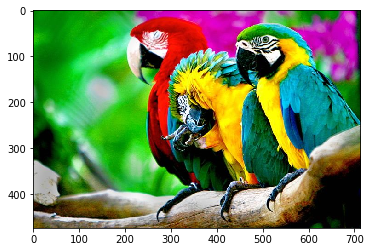

In [8]:
pylab.imshow(image)

In [12]:
img = img_as_float(image)

In [13]:
img

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21568627, 0.01568627],
        [0.        , 0.20784314, 0.01568627],
        [0.01176471, 0.21568627, 0.03529412]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       ...,

       [[0.4745098 , 0.37647059, 0.02352941],
        [0.45098039, 0.35294118, 0.        ],
        [0.45098039, 0

In [14]:
x, y, z = img.shape
objects_features_matrix = np.reshape(img, (x * y, z))

In [15]:
objects_features_matrix

array([[0.01568627, 0.49411765, 0.01960784],
       [0.01176471, 0.49019608, 0.01568627],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.08627451, 0.15686275, 0.23529412]])

In [67]:
kmeans = KMeans( init='k-means++', random_state=241).fit(objects_features_matrix)

In [68]:
img_new = []
clustr = kmeans.cluster_centers_

In [69]:
labl = kmeans.labels_    

In [70]:
for i in labl:
    img_new.append(clustr[i])

In [71]:
img_new=np.array(img_new)

In [72]:
img_new

array([[0.09531921, 0.63487784, 0.06660212],
       [0.09531921, 0.63487784, 0.06660212],
       [0.09531921, 0.63487784, 0.06660212],
       ...,
       [0.05321094, 0.11664436, 0.04965332],
       [0.05321094, 0.11664436, 0.04965332],
       [0.05321094, 0.11664436, 0.04965332]])

In [60]:
MSE = mean_squared_error(img_new,objects_features_matrix)

In [61]:
PSNR = ((20 * math.log10(1)) - (10 * math.log10(MSE)))

In [62]:
PSNR

22.766330967751426

In [64]:
best=0
for i in range(3,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241).fit(objects_features_matrix)
    img_new = []
    clustr = kmeans.cluster_centers_
    labl = kmeans.labels_ 
    for j in labl:
        img_new.append(clustr[j])
    img_new=np.array(img_new)
    MSE = mean_squared_error(img_new,objects_features_matrix)
    PSNR = ((20 * math.log10(1)) - (10 * math.log10(MSE)))
    print(PSNR)
    if PSNR > 20:
        best = i
        break
    

13.176071753665969
14.394319521891548
15.55796253649599
16.57272728131344
17.67192758330353
18.468190342382925
19.144921263233208
19.675484904374
20.163798416254338


In [65]:
best


11

In [78]:
img_pict_new = img_as_ubyte(objects_features_matrix)

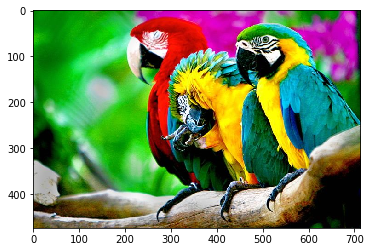

In [83]:
pylab.imshow(image)

In [76]:
img_pict_new

array([[ 24, 162,  17],
       [ 24, 162,  17],
       [ 24, 162,  17],
       ...,
       [ 14,  30,  13],
       [ 14,  30,  13],
       [ 14,  30,  13]], dtype=uint8)

In [84]:
reduced_image = recreate_image(kmeans.cluster_centers_, kmeans.labels_, w, h)

NameError: name 'recreate_image' is not defined